# Тема 2. Моделирование связи частотного и классического определения вероятности
## Задание
Приведите пример, показывающий связь частотного и классического определения вероятности с помощью моделирования (на примере задачи про красно-синие шары или задачи о сумме очков на двух кубиках). Графически показать стремление частотной вероятности к классической при увеличении числа опытов.

## Общая часть двух программ

### Импорт библиотек

In [1]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Выбор числа испытаний

In [2]:
NUM_EXPERIMENTS = 10000

### Задание сида для получения и вправду случайных значений

In [3]:
random.seed(time.time())

## Подбрасывание монеты
В данном случае классическая вероятность будет определяться как $\frac1 2 = 0.5$, то есть, если мы рассмотрим событие А - на монете выпал орёл, то вероятность $P(A)=\frac1 2 = 0.5$. 

Теперь рассчитаем разницу между классической вероятностью и частотной с помощью Python

 Опытов  Частотная вероятность  Классическая вероятность  Разница
      1                 0.0000                       0.5   0.5000
   1112                 0.5054                       0.5   0.0054
   2223                 0.5056                       0.5   0.0056
   3334                 0.5096                       0.5   0.0096
   4445                 0.5069                       0.5   0.0069
   5556                 0.5027                       0.5   0.0027
   6667                 0.5011                       0.5   0.0011
   7778                 0.5028                       0.5   0.0028
   8889                 0.5013                       0.5   0.0013
  10000                 0.5014                       0.5   0.0014


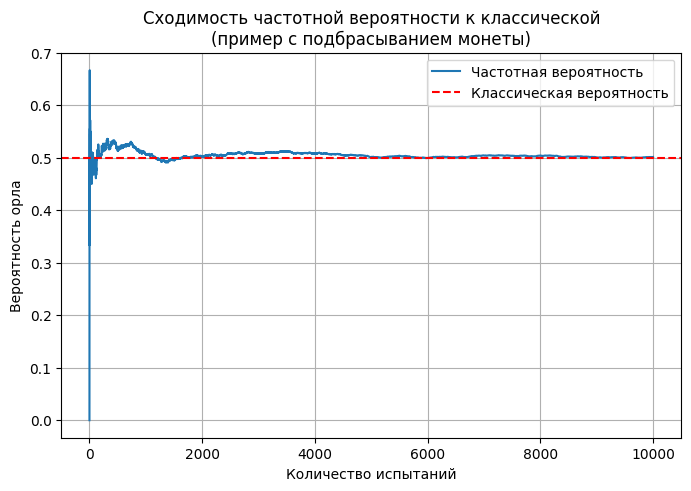

In [4]:
classicalProb = 0.5

results = []
countOfEagls = 0

for i in range(1, NUM_EXPERIMENTS + 1):
    toss = random.choice(["E", "T"])
    if toss == "E":
        countOfEagls += 1
    results.append(countOfEagls / i)

countOfRows = 10
indices = np.linspace(1, NUM_EXPERIMENTS, countOfRows, dtype=int)

experiments = indices
freqProbabilities = [results[i - 1] for i in indices]

data = {
    "Опытов": experiments,
    "Частотная вероятность": [round(p, 4) for p in freqProbabilities],
    "Классическая вероятность": [classicalProb] * len(experiments),
    "Разница": [round(abs(p - classicalProb), 4) for p in freqProbabilities]
}

df = pd.DataFrame(data)
print(df.to_string(index=False))

plt.figure(figsize=(8, 5))
plt.plot(range(1, NUM_EXPERIMENTS + 1), results, label="Частотная вероятность")
plt.axhline(y=classicalProb, color="red", linestyle="--", label="Классическая вероятность")
plt.title("Сходимость частотной вероятности к классической\n(пример с подбрасыванием монеты)")
plt.xlabel("Количество испытаний")
plt.ylabel("Вероятность орла")
plt.legend()
plt.grid(True)
plt.show()


## Сумма очков на двух кубиках
При подбрасывании двух кубиков, классическая вероятность для каждой суммы зависит от числа комбинаций, дающих эту сумму. Рассмотрим эти вероятности:

|Сумма|Количество комбинаций|Классическая вероятность|
|:-:|:-:|:-:|
|2|1|$\frac 1 {36}$|
|3|2|$\frac 2 {36}$|
|4|3|$\frac 3 {36}$|
|5|4|$\frac 4 {36}$|
|6|5|$\frac 5 {36}$|
|7|6|$\frac 6 {36}$|
|8|5|$\frac 5 {36}$|
|9|4|$\frac 4 {36}$|
|10|3|$\frac 3 {36}$|
|11|2|$\frac 2 {36}$|
|12|1|$\frac 1 {36}$|

Теперь можем рассчитать разницу между классической вероятностью и частотной с помощью Python


Сравнение частотных вероятностей по мере увеличения количества испытаний
 Испытаний  P(Σ=2)  P(Σ=3)  P(Σ=4)  P(Σ=5)  P(Σ=6)  P(Σ=7)  P(Σ=8)  P(Σ=9)  P(Σ=10)  P(Σ=11)  P(Σ=12)
         1  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000  0.0000  0.0000   0.0000   0.0000   0.0000
      1112  0.0351  0.0495  0.0845  0.1016  0.1340  0.1682  0.1502  0.1169   0.0773   0.0594   0.0234
      2223  0.0324  0.0544  0.0832  0.1048  0.1413  0.1682  0.1462  0.1075   0.0792   0.0576   0.0252
      3334  0.0339  0.0534  0.0807  0.1089  0.1344  0.1716  0.1425  0.1149   0.0783   0.0561   0.0255
      4445  0.0313  0.0576  0.0830  0.1141  0.1350  0.1674  0.1397  0.1143   0.0799   0.0540   0.0238
      5556  0.0304  0.0563  0.0830  0.1129  0.1334  0.1661  0.1397  0.1170   0.0812   0.0544   0.0257
      6667  0.0298  0.0547  0.0840  0.1122  0.1354  0.1632  0.1399  0.1162   0.0832   0.0549   0.0262
      7778  0.0302  0.0557  0.0846  0.1115  0.1359  0.1626  0.1365  0.1155   0.0854   0.0550   0.0271
      88

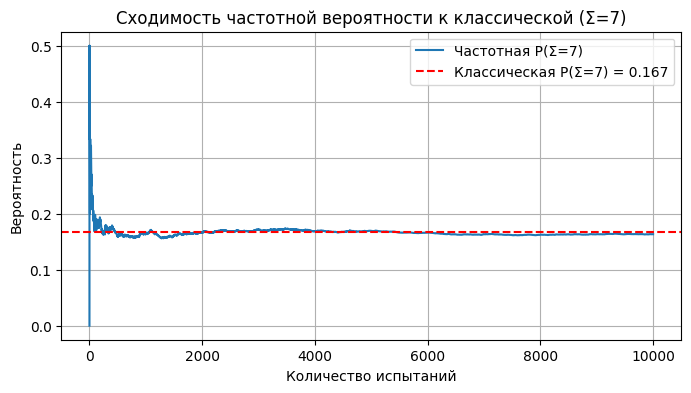

In [5]:
sumCounts = {
    2: 1,
    3: 2,
    4: 3,
    5: 4,
    6: 5,
    7: 6,
    8: 5,
    9: 4,
    10: 3,
    11: 2,
    12: 1
}
totalChallenges = 6 ** 2
classicalProb = {s : count / totalChallenges for s, count in sumCounts.items()}

freqCounts = {s: 0 for s in range(2, 13)}
freqHistory = {s: [] for s in range(2, 13)}

for i in range(1, NUM_EXPERIMENTS + 1):
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    sum = dice1 + dice2

    freqCounts[sum] += 1

    for val in range(2, 13):
        freqHistory[val].append((freqCounts[val] / i))

countOfRows = 10
indices = np.linspace(1, NUM_EXPERIMENTS, countOfRows, dtype=int)

dataRows = []
for index in indices:
    row = {"Испытаний": index}
    for s in range(2, 13):
        row[f"P(Σ={s})"] = round(freqHistory[s][index - 1], 4)
    dataRows.append(row)

df = pd.DataFrame(dataRows)
print("\nСравнение частотных вероятностей по мере увеличения количества испытаний")
print(df.to_string(index=False))

finalFreqProb = {s: freqHistory[s][-1] for s in range(2, 13)}
summary = pd.DataFrame({
    "Сумма": list(range(2, 13)),
    "Классическая вероятность": [round(classicalProb[s], 4) for s in range(2, 13)],
    "Частотная вероятность (последняя)": [round(finalFreqProb[s], 4) for s in range(2, 13)],
    "Разница": [round(abs(finalFreqProb[s] - classicalProb[s]), 4) for s in range(2, 13)]
})

print("\n Сравнение частотной вероятности и классической")
print(summary.to_string(index=False))

plt.figure(figsize=(8, 4))
s = 7  # Выбор интересующей суммы
plt.plot(range(1, NUM_EXPERIMENTS + 1), freqHistory[s], label=f"Частотная P(Σ={s})")
plt.axhline(y=classicalProb[s], color="red", linestyle="--", label=f"Классическая P(Σ={s}) = {classicalProb[s]:.3f}")
plt.title("Сходимость частотной вероятности к классической (Σ=7)")
plt.xlabel("Количество испытаний")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True)
plt.show()
